In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.kde import gaussian_kde
import random 

In [18]:
class Gaussian(object):

  def __init__(self,x,M1,S1,M2,S2):
    self.G1 = stats.norm.pdf(x, M1, S1)
    self.M1 = M1
    self.S1 = S1
    self.G2 = stats.norm.pdf(x, M2, S2)
    self.M2 = M2
    self.S2 = S2

  def mix_G(self,x):
    return (0.4 * self.G1 + 0.6 * self.G2)

  def mix_G_distribution(self):
    ratio = 0.3
    if np.random.rand() < ratio:
      return random.normalvariate(self.M1, self.S1)
    else:
      return random.normalvariate(self.M2, self.S2)


[]

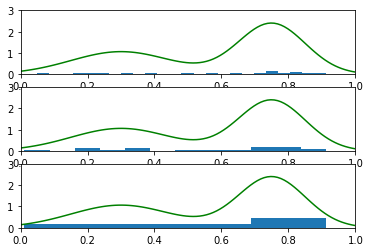

In [37]:
x = np.linspace(0,1,100)
M1 = 0.3
S1 = 0.15
M2 = 0.75
S2 = 0.1

model = Gaussian(x,M1,S1,M2,S2)

N = 50
Data = [model.mix_G_distribution() for n in range(N)]
weights = np.ones(len(Data))/float(len(Data))

plt.subplot(3,1,1)
plt.hist(Data, bins=int(1/0.04), weights=weights,norm)
plt.plot(x, model.mix_G(x), "g-")
plt.xlim(0,1)
plt.ylim(0,3)

plt.subplot(3,1,2)
plt.hist(Data, bins=int(1/0.08),weights=weights)
plt.plot(x, model.mix_G(x), "g-")
plt.xlim(0,1)
plt.ylim(0,3)

plt.subplot(3,1,3)
plt.hist(Data, bins=int(1/0.25), weights=weights)
plt.plot(x, model.mix_G(x), "g-")
plt.xlim(0,1)
plt.ylim(0,3)

plt.plot()

In [20]:
1/0.04

25.0